# Import Modules

In [1]:
import sys
sys.path.append('../')

import TAZ

In [2]:
%matplotlib widget

# Basic Fitting Example (WigBayes)

### Setting Mean Parameter Data

In [3]:
A     = 181
EB    = (1e-5, 2550)
pM    = [0.12547, 0.14404]
FreqF = 1/15
Freq  = [1/8.9868, 1/8.3065]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

SGs = TAZ.SpinGroups.make(l, j)
MP = TAZ.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

print('Printing Mean Parameters:')
print(MP)

Printing Mean Parameters:
Nuclear Spin        = None
Atomic Number       = None
Atomic Mass Number  = 181
Atomic Mass         = 181.00000 (amu)
Channel Radius      = 7.7576830 (fm)
Energy Bounds       = 1.000e-05 < E < 2.550e+03 (eV)
False Level Density = 0.0666667 (1/eV)

                            3+          4+
Level Densities       0.111274    0.120388
Brody Parameters      1.000000    1.000000
Mean Neutron Width   44.113550   33.386970
Neutron Width DOF     1.000000    1.000000
Mean Gamma Width     55.000000   55.000000
Gamma Width DOF     250.000000  250.000000
Truncation N Width    0.000000    0.000000
Missing Fraction      0.000000    0.000000


### Sample Resonance Ladder

In [4]:
Res, Types, Missed_Res, Missed_Types = MP.sample()

In [5]:
Prior, TPPrior = TAZ.PTBayes(Res, MP)
distributions = MP.distributions('Wigner')
runMaster = TAZ.RunMaster(Res.E, MP.EB, distributions, MP.FreqF, Prior, TPPrior)
Posterior, log_total_probability = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Analysis:

PT-only score =  53.60%
Wigner+PT score =  56.78%

Confusion Matrix:
     A    B  F
A   99   67  0
B  179  240  0
F    4    8  0



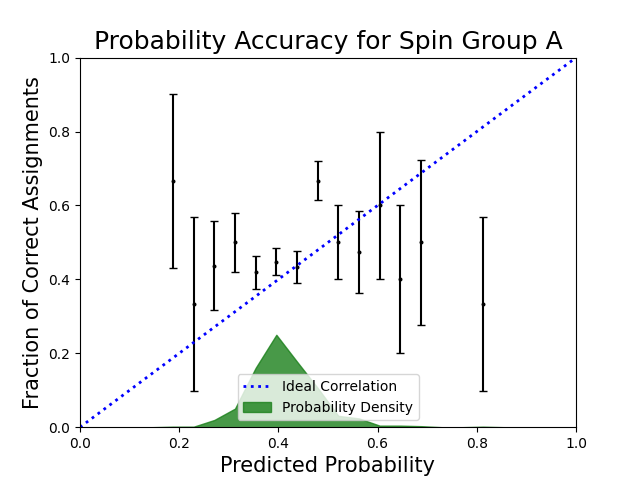

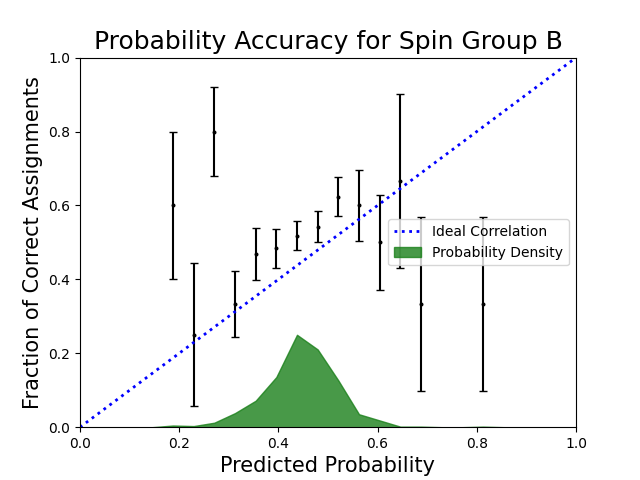

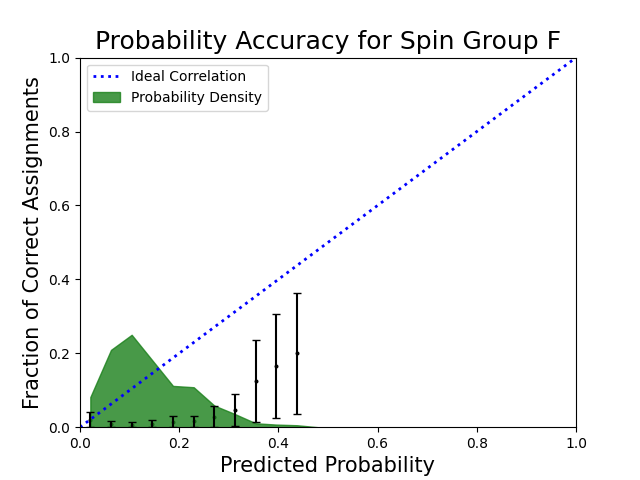

In [6]:
TAZ.analysis.PrintScore(Prior, Types, 'PT-only')
TAZ.analysis.PrintScore(Posterior, Types, 'Wigner+PT')
print()
TAZ.analysis.ConfusionMatrix(Posterior, Types, ['A', 'B', 'F'])
print()
TAZ.analysis.ProbCorrPlot(Posterior, Types, ['A', 'B', 'F'])

In [7]:
print(Posterior)

[[0.41235699 0.46706426 0.12057875]
 [0.38688725 0.49911357 0.11399919]
 [0.55409767 0.34256555 0.10333678]
 ...
 [0.47349508 0.45273144 0.07377349]
 [0.49502826 0.33138141 0.17359033]
 [0.32964833 0.48688451 0.18346716]]


# Basic Spingroup Sampling (WigSample)

...